In [1]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [10]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install -U pycaret scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *
from pycaret.datasets import get_data

#from skopt import dummy_minimize, gp_minimize, forest_minimize
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from datetime import datetime

In [17]:
df = pd.read_pickle('df_final.pkl')

In [19]:
df = pd.read_pickle('df_final.pkl')
df.shape

(14760, 48)

In [20]:
df_train = df.sample(frac=1, random_state=42) # Dados para treinamento
df_test = df.drop(df_train.index) # Dados para validacao

# Excluindo os demais registros
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

print(f'Dados para modelagem: {df_train.shape}')
print(f'Dados reservados para a validação: {df_test.shape}')

Dados para modelagem: (14760, 48)
Dados reservados para a validação: (0, 48)


In [22]:
# Configurando o ambienteener
setup_01 = setup(data = df_train
                  , target = 'Class'
                  , session_id = 42
                  , train_size= 0.9
                  , silent = True)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(14760, 48)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [23]:
df_transformed = get_config('X_train')
df_transformed.shape

(13284, 47)

In [24]:
# Comparando os modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,1.0000,1.0000,0.9969,0.9984,0.9981,0.9981,1.218
rf,Random Forest Classifier,0.9993,0.9999,1.0000,0.9960,0.9980,0.9976,0.9976,4.077
lightgbm,Light Gradient Boosting Machine,0.9993,0.9999,1.0000,0.9960,0.9980,0.9976,0.9976,0.826
dt,Decision Tree Classifier,0.9934,0.9960,1.0000,0.9619,0.9805,0.9766,0.9768,0.423
gbc,Gradient Boosting Classifier,0.9883,0.9970,0.9431,0.9863,0.9642,0.9572,0.9576,10.021
ada,Ada Boost Classifier,0.9773,0.9969,0.8989,0.9624,0.9294,0.9159,0.9167,2.108
lr,Logistic Regression,0.9728,0.9771,0.8709,0.9625,0.9143,0.8982,0.8999,0.650
ridge,Ridge Classifier,0.9720,0.0000,0.8505,0.9787,0.9100,0.8935,0.8967,0.039
lda,Linear Discriminant Analysis,0.9711,0.9791,0.8514,0.9716,0.9075,0.8905,0.8932,0.178
nb,Naive Bayes,0.9429,0.9672,0.7056,0.9365,0.8044,0.7717,0.7826,0.039


In [25]:
# Melhor modelo
model = best_model
print(model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [26]:
# # Criando o modelo
# rf = create_model('rf')
# # Otimizando o modelo
# rf_tuned = tune_model(rf, optimize='recall')
# print(rf)

In [27]:
# Otimizando o modelo
model_tuned = tune_model(model, optimize='recall')
print(model_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9789,0.9913,0.8784,0.9949,0.9330,0.9206,0.9231
1,0.9789,0.9869,0.8739,1.0000,0.9327,0.9203,0.9232
2,0.9782,0.9905,0.8784,0.9898,0.9308,0.9179,0.9202
3,0.9752,0.9919,0.8604,0.9896,0.9205,0.9059,0.9090
4,0.9759,0.9886,0.8688,0.9846,0.9231,0.9089,0.9114
5,0.9691,0.9880,0.8326,0.9787,0.8998,0.8816,0.8857
6,0.9804,0.9921,0.8824,1.0000,0.9375,0.9259,0.9285
7,0.9744,0.9879,0.8597,0.9845,0.9179,0.9028,0.9057
8,0.9676,0.9847,0.8145,0.9890,0.8933,0.8744,0.8802


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


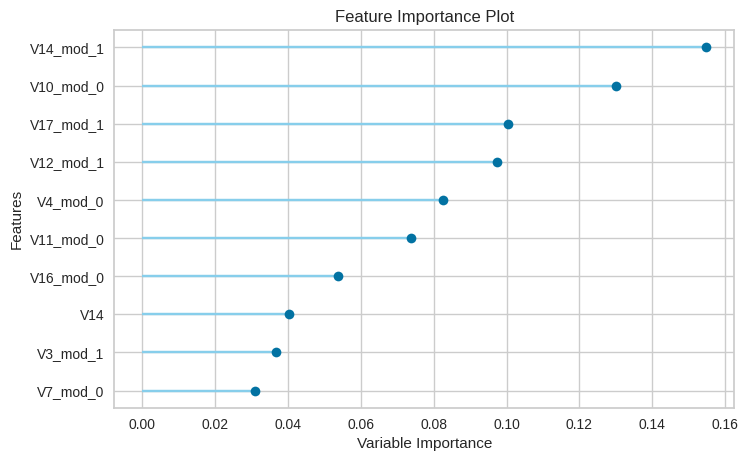

In [28]:
# Feature importance plot
plot_model(model_tuned, plot='feature')

In [29]:
evaluate_model(model_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

=== Dataframe ORIGINAL, sem balanceamento === 



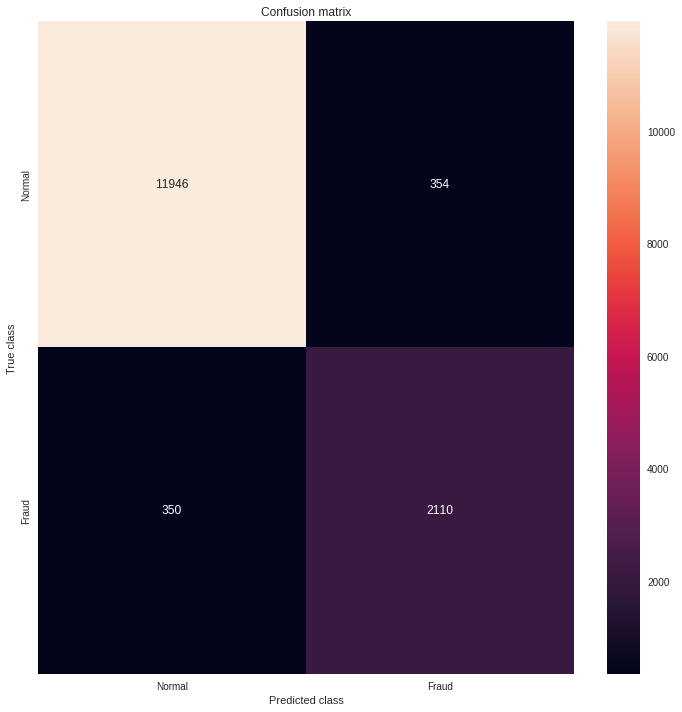

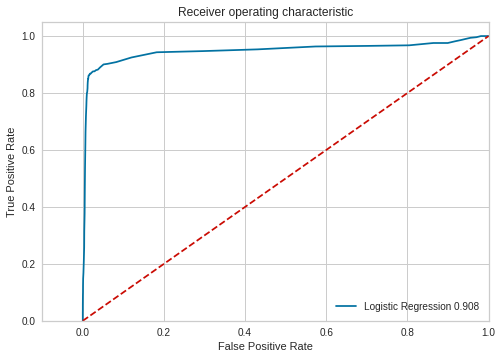

=== Dataframe ORIGINAL, sem balanceamento === 

A acurácia é 0.9523035230352304
A precisão é 0.8563311688311688
O recall é 0.8577235772357723
O Score é 0.8570268074735987
O coeficiente de correlação é 0.8284046836242606


In [35]:
# Lendo o dataframe original e completo (sem balanceamento)
df_raw = pd.read_pickle('df_final.pkl')

# Criando as colunas no Dataframe original para aplicar o modelo
df_mod = df_raw.copy()
df_mod['V1_mod'] = df_mod.V1.map(lambda x: 1 if x < -3 else 0)
df_mod['V2_mod'] = df_mod.V2.map(lambda x: 1 if x > 2.5 else 0)
df_mod['V3_mod'] = df_mod.V3.map(lambda x: 1 if x < -3.5 else 0)
df_mod['V4_mod'] = df_mod.V4.map(lambda x: 1 if x > 2 else 0)
df_mod['V5_mod'] = df_mod.V5.map(lambda x: 1 if x < -4.5 else 0)
df_mod['V6_mod'] = df_mod.V6.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V7_mod'] = df_mod.V7.map(lambda x: 1 if x < -1.5 else 0)
df_mod['V9_mod'] = df_mod.V9.map(lambda x: 1 if x < -2 else 0)
df_mod['V10_mod'] = df_mod.V10.map(lambda x: 1 if x < -2 else 0)
df_mod['V11_mod'] = df_mod.V11.map(lambda x: 1 if x > 2 else 0)
df_mod['V12_mod'] = df_mod.V12.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V14_mod'] = df_mod.V14.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V16_mod'] = df_mod.V16.map(lambda x: 1 if x < -2 else 0)
df_mod['V17_mod'] = df_mod.V17.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V18_mod'] = df_mod.V18.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V19_mod'] = df_mod.V19.map(lambda x: 1 if (x > 1.5) | (x < -1.75) else 0)
df_mod['V21_mod'] = df_mod.V21.map(lambda x: 1 if x > 0.3 else 0)

X_test = df_mod.drop(['Class'],axis=1)
y_test = df_mod['Class']
#model.fit(X_train, y_train)  # Treinando
y_pred = model_tuned.predict(X_test) # Predicao

# Calculando a matriz de confusão
from sklearn.metrics import confusion_matrix
print('=== Dataframe ORIGINAL, sem balanceamento === \n')
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Plotando a curva ROC e calculando a AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression {round(logit_roc_auc, 3)}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

print('=== Dataframe ORIGINAL, sem balanceamento === \n')
print(f'A acurácia é {accuracy}')
print(f'A precisão é {precision}')
print(f'O recall é {recall}')
print(f'O Score é {f1}')
print(f'O coeficiente de correlação é {MCC}')

In [36]:
# Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.
final_model = finalize_model(model_tuned)
print(model_tuned)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [38]:
# Adquirindo o nome do modelo
model_name = str(best_model).split('(')[0]
print(model_tuned)


# Adquirindo a data e hora exata
# now = datetime.now()

# Esta função realiza a persistencia do modelo em disco
save_model(model_tuned,f'Final Model ({model_name})')

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0, min_impurity_split=None,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=9, max_features='sqrt',
                                       max_leaf_nodes=